# Matplotlib Exercises

***
### Section A - Sample code on charts



Example 1 shows a bar chart

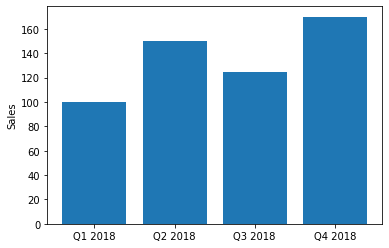

In [15]:
# Example 1

import matplotlib.pyplot as plt

#set up values
VALUES = [100,150,125,170]
POS = [0,1,2,3]
LABELS = ['Q1 2018','Q2 2018','Q3 2018','Q4 2018']

#set up the chart
plt.bar(POS,VALUES)
plt.xticks(POS, LABELS)
plt.ylabel('Sales')

#to display the chart
plt.show()


Example 2 shows a component bar chart

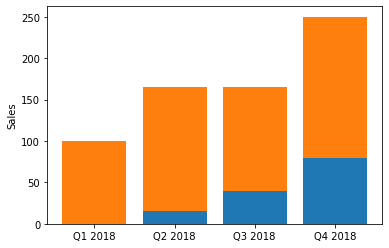

In [16]:
# Example 2

import matplotlib.pyplot as plt

#set up values
VALUESA = [100,150,125,170]
VALUESB = [0,15,40,80]
POS = [0,1,2,3]
LABELS = ['Q1 2018','Q2 2018','Q3 2018','Q4 2018']

#set up the first bar
plt.bar(POS,VALUESB)
#set up the stacked bars
plt.bar(POS,VALUESA,bottom=VALUESB)
plt.xticks(POS, LABELS)
plt.ylabel('Sales')
plt.xticks(POS, LABELS)

#to display the chart
plt.show()


Example 3 shows subplots

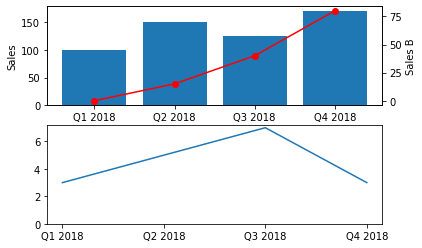

In [17]:
# Example 3

import matplotlib.pyplot as plt

VALUESA = [100,150,125,170]
VALUESB = [0,15,40,80]
VALUESC = [3,5,7,3]
POS = [0,1,2,3]
LABELS = ['Q1 2018','Q2 2018','Q3 2018','Q4 2018']

# Create the first plot
plt.subplot(2,1,1)

#creata a bar grahp with informaton about VALUESA
plt.bar(POS,VALUESA)
plt.ylabel('Sales')

#create a different Y axis, and add information about VALUESB as a line plot
plt.twinx()
plt.plot(POS,VALUESB,'o-',color='red')
plt.xticks(POS, LABELS)
plt.ylabel('Sales B')
plt.xticks(POS, LABELS)

#create another subplot and fill it iwth VALUESC
plt.subplot(2,1,2)
plt.plot(POS, VALUESC)
plt.gca().set_ylim(ymin=0)
plt.xticks(POS,LABELS)

#plt.show()
plt.savefig('data.png')

Example 4 shows formatting on charts

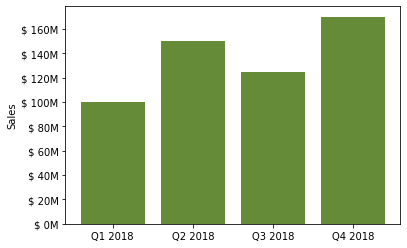

In [18]:
# Example 4 

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def value_format(value, position):
	return '$ {}M'.format(int(value))

# set up values
VALUES = [100,150,125,170]
POS = [0,1,2,3]
LABELS = ['Q1 2018','Q2 2018','Q3 2018','Q4 2018']

# set up the chart
# Colors can be specified in multiple formats, as 
# described in https://matplotlib.org/api/colors_api.html
# https://xkcd.com/color/rgb/
plt.bar(POS,VALUES, color='xkcd:moss green')
plt.xticks(POS, LABELS)
plt.ylabel('Sales')

# retreive the current axes and apply formatter 
axes = plt.gca()
axes.yaxis.set_major_formatter(FuncFormatter(value_format))

# to display the chart
plt.show()


Example 5 shows scatterplot

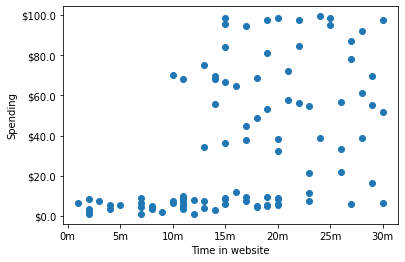

In [19]:
# Example 5

import csv
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def format_minutes(value, pos):
	return '{}m'.format(int(value))

def format_dollars(value, pos):
	return '${}'.format(value)

# read data from csv
fp = open("scatter.csv","r", newline='')
reader = csv.reader(fp)
data = list(reader)

data_x=[]
data_y=[]
for x, y in data:
	data_x.append(float(x))
	data_y.append(float(y))
	
plt.scatter(data_x, data_y)

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_minutes))
plt.xlabel('Time in website')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollars))
plt.ylabel('Spending')

plt.show()


***
### Section B - Exercise



#### Exercise 1

Read the file, bmi.xlsx and calculate the BMI for each of the record.

Plot a bar chart showing number of records in each of the following category:

1) Under weight - below 18.5
2) Ideal weight - 18.5 to below 25
3) Overweight - 25.0 to below 30
4) Obese - 30 and above



In [20]:
# Write code for Exercise 1 here

import openpyxl

workbook = openpyxl.load_workbook("bmi.xlsx")
sheet=workbook["Sheet1"]

#read all data using for loop
max_row = sheet.max_row 

bmi_list = []

#loop through every row
for i in range(2, max_row + 1):
    
    #read cell
    name = sheet.cell(row=i, column=1).value       
    gender = sheet.cell(row=i, column=2).value       
    weight = sheet.cell(row=i, column=3).value      
    height = sheet.cell(row=i, column=4).value       
    bmi = round(float(weight) / float(height)**2, 1)

    print ("Name : " + name + " bmi : " + str(bmi))
    bmi_list.append(bmi)


Name : alan bmi : 21.2
Name : peter bmi : 21.6
Name : mary bmi : 19.5
Name : jack bmi : 17.7
Name : michael bmi : 19.8
Name : jerry bmi : 27.0
Name : john bmi : 26.8
Name : alice bmi : 24.2
Name : elle bmi : 19.2
Name : sam bmi : 18.0
Name : kyle bmi : 20.5
Name : tom bmi : 20.5
Name : stuart bmi : 21.9
Name : harry bmi : 27.8
Name : vale bmi : 23.1
Name : cherry bmi : 23.2
Name : albert bmi : 27.7
Name : larry bmi : 23.2
Name : sally bmi : 21.0
Name : jane bmi : 26.0


[2, 13, 5, 0]


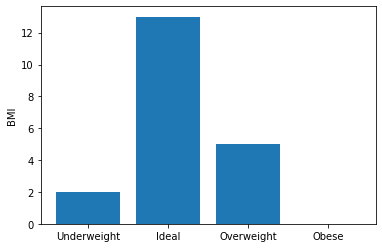

In [21]:

category = {}
category['Underweight'] = 0
category['Ideal'] = 0
category['Overweight'] = 0
category['Obese'] = 0


for i in bmi_list:
    if i < 18.5:
        category['Underweight'] = category['Underweight'] + 1
    elif i < 25:
        category['Ideal'] = category['Ideal'] + 1
    elif i < 30:
        category['Overweight'] = category['Overweight'] + 1
    else:
        category['Obese'] = category['Obese'] + 1


import matplotlib.pyplot as plt

POS = [0,1,2,3]
LABELS = ['Underweight','Ideal','Overweight','Obese']

#set up values
VALUES = []
for i in LABELS:
    VALUES.append(category[i])

print (VALUES)


#set up the chart
plt.bar(POS,VALUES)
plt.xticks(POS, LABELS)
plt.ylabel('BMI')

#to display the chart
plt.show()

#### Exercise 2

Plot a scatter plot for the BMI, showing red for female and blue for males. 


In [22]:
# Write code for Exercise 2 here

import openpyxl

workbook = openpyxl.load_workbook("bmi.xlsx")
sheet=workbook["Sheet1"]

#read all data using for loop
max_row = sheet.max_row 

bmi_list_male = []
bmi_list_female = []
weight_male = []
weight_female = []

#loop through every row
for i in range(2, max_row + 1):
    
    #read cell
    name = sheet.cell(row=i, column=1).value       
    gender = sheet.cell(row=i, column=2).value       
    weight = sheet.cell(row=i, column=3).value      
    height = sheet.cell(row=i, column=4).value       
    bmi = round(float(weight) / float(height)**2, 1)

    print ("Name : " + name + " bmi : " + str(bmi))
    if gender == "male":
        bmi_list_male.append(bmi)
        weight_male.append(weight)
    else:
        bmi_list_female.append(bmi)
        weight_female.append(weight)


Name : alan bmi : 21.2
Name : peter bmi : 21.6
Name : mary bmi : 19.5
Name : jack bmi : 17.7
Name : michael bmi : 19.8
Name : jerry bmi : 27.0
Name : john bmi : 26.8
Name : alice bmi : 24.2
Name : elle bmi : 19.2
Name : sam bmi : 18.0
Name : kyle bmi : 20.5
Name : tom bmi : 20.5
Name : stuart bmi : 21.9
Name : harry bmi : 27.8
Name : vale bmi : 23.1
Name : cherry bmi : 23.2
Name : albert bmi : 27.7
Name : larry bmi : 23.2
Name : sally bmi : 21.0
Name : jane bmi : 26.0


[21.2, 21.6, 17.7, 19.8, 27.0, 26.8, 20.5, 20.5, 21.9, 27.8, 27.7, 23.2]
[19.5, 24.2, 19.2, 18.0, 23.1, 23.2, 21.0, 26.0]


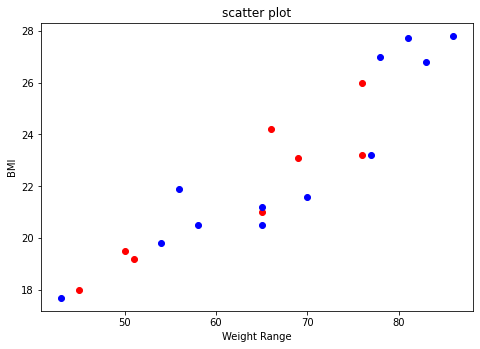

In [23]:

import matplotlib.pyplot as plt

print (bmi_list_male)
print (bmi_list_female)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(weight_female, bmi_list_female, color='r')
ax.scatter(weight_male, bmi_list_male, color='b')
ax.set_xlabel('Weight Range')
ax.set_ylabel('BMI')
ax.set_title('scatter plot')
plt.show()